# Solving first order ODE - Nelder Mead

In this notebook we will solve a first order ode. We will assume the following trial solution:
<p style="text-align: center;">Y(x) = A + (x - a)*N(x, w)</p>
For solving the initial value problem Y(a) = A, we will consider a = 0.


## Solving for cos(x)

We will have a cos function with initial condition Y(0) = 2, for x in [0, 2].

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
## no class definitions

def myf(x):
    return np.cos(x)

def sig(x): 
    return 1/(1 + np.exp(-x))
    
def sig_first(x): # first derivative of sigmoid
    return sig(x)*(1 - sig(x))
       
def compute(arr):
    arr_new_dim = np.reshape(arr, (-1, 1))
    w = arr_new_dim[0:global_n]
    b = arr_new_dim[global_n:2*global_n]
    v = arr_new_dim[2*global_n:3*global_n]
    
    hid_layer = np.add(np.dot(global_inp, np.transpose(w)), np.transpose(b))
    act_func = sig(hid_layer)
    return np.dot(act_func, v)

# first derivative of nn
def compute_first(arr):
    arr_new_dim = np.reshape(arr, (-1, 1))
    w = arr_new_dim[0:global_n]
    b = arr_new_dim[global_n:2*global_n]
    v = arr_new_dim[2*global_n:3*global_n]
    
    hid_layer = np.add(np.dot(global_inp, np.transpose(w)), np.transpose(b))
    act_func = sig_first(hid_layer)
    return np.dot(act_func, v*w)

 
def cost(arr):
    return sum((compute(arr) + global_inp * compute_first(arr) - myf(global_inp))**2)

## Problem 1

$$
  \frac{dy}{dx} = cos(x), ~~y(0) = 2
$$

We will solve for x in [0, 2].

[0.0003073]


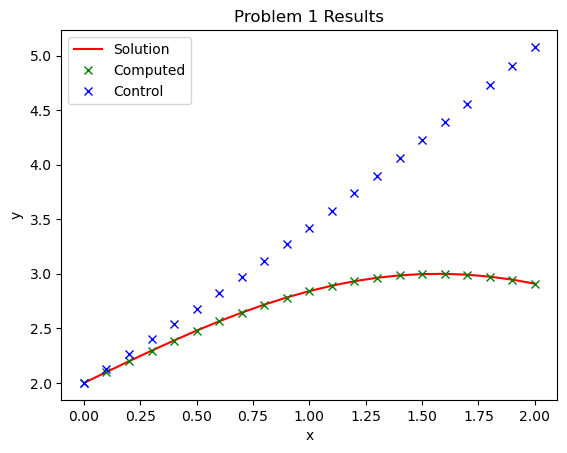

In [3]:
global_inp = np.arange(0.0, 2.01, 0.1)
global_inp = np.reshape(global_inp, (-1, 1))

# arr = [w1, ..., wn, b1, ..., bn, v1, ..., vn] 
weights = [0.2, 0.3, 0.3,      0.4, 0.5, 0.5,      0.6, 0.7, 0.8]
global_n = 3

new_weights = optimize.minimize(cost, weights, method='Nelder-Mead')

solution = np.sin(global_inp) + 2
train_value = 2 + global_inp * compute(new_weights.x)
control_value = 2 + global_inp * compute(weights)

plt.plot(global_inp, solution, 'r-', global_inp, train_value, 'gx', global_inp, control_value, 'bx')
plt.legend(["Solution", "Computed", "Control"])
plt.title("Problem 1 Results")
plt.xlabel("x")
plt.ylabel("y")

print(cost(new_weights['x']))

## Problem 2

$$
  \frac{dy}{dx} = \frac{cos(x)}{2y},~~ y(0) = 1
$$

We will solve for x in [0, 2].

[42.42022549]
[1.85691434e-05]


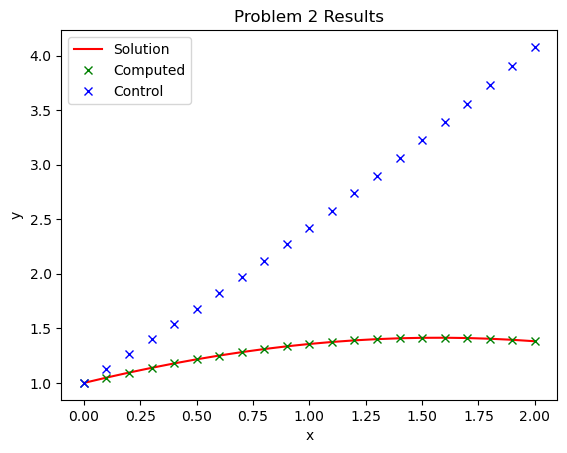

In [4]:
def f(x, y):
    return np.cos(x)/(2*y)
    

def solution(x):
    return np.sqrt(np.sin(x) + 1) 

 
def cost_2(arr):
    y = 1 + global_inp * compute(arr)
    return sum((compute(arr) + global_inp * compute_first(arr) - f(global_inp, y))**2)


weights_2 = [0.2, 0.3, 0.3,      0.4, 0.5, 0.5,      0.6, 0.7, 0.8]
global_n_2 = 3

new_weights_2 = optimize.minimize(cost_2, weights_2, method='Nelder-Mead')

train_value = 1 + global_inp * compute(new_weights_2.x)
control_value = 1 + global_inp * compute(weights_2)

plt.plot(global_inp, solution(global_inp), 'r-', global_inp, train_value, 'gx', global_inp, control_value, 'bx')
plt.legend(["Solution", "Computed", "Control"])
plt.title("Problem 2 Results")
plt.xlabel("x")
plt.ylabel("y")

print(cost_2(weights_2))
print(cost_2(new_weights_2.x))

## Problem 3

$$
  \frac{dy}{dx} = y + x,~~ y(0) = 0
$$

We will solve for x in [0, 1].

[5.76024697]
[2.13918917e-06]


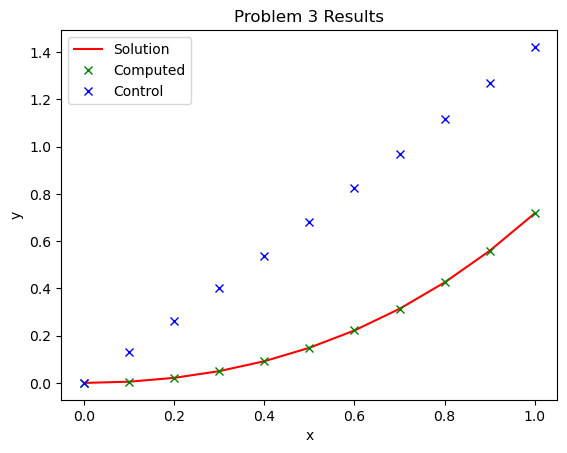

In [5]:
global_inp = np.arange(0.0, 1.1, 0.1)
global_inp = np.reshape(global_inp, (-1, 1))

def f_3(x, y):
    return x+y
    

def solution(x):
    return -x -1 + np.exp(x)

 
def cost_3(arr):
    y = 0 + global_inp * compute(arr)
    return sum((compute(arr) + global_inp * compute_first(arr) - f_3(global_inp, y))**2)


weights_3 = [0.2, 0.3, 0.3,      0.4, 0.5, 0.5,      0.6, 0.7, 0.8]
global_n_3 = 3

new_weights_3 = optimize.minimize(cost_3, weights_3, method='Nelder-Mead')

train_value = 0 + global_inp * compute(new_weights_3.x)
control_value = 0 + global_inp * compute(weights_3)

plt.plot(global_inp, solution(global_inp), 'r-', global_inp, train_value, 'gx', global_inp, control_value, 'bx')
plt.legend(["Solution", "Computed", "Control"])
plt.title("Problem 3 Results")
plt.xlabel("x")
plt.ylabel("y")

print(cost_3(weights_3))
print(cost_3(new_weights_3.x))